<a href="https://colab.research.google.com/github/mpantonucci/Bootcamp-DataScience/blob/main/Desafio%20-%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random

In [4]:
descricao_col_unfederacao = "Unidade da Federação"
descricao_col_coltotal    = "Total"
dados = pd.read_csv("/content/A160324189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")
colunas_valores_preenchidos = dados.mean().index.tolist()
colunas_valores_preenchidos.insert(0, descricao_col_unfederacao)
dados_valores_preenchidos =  dados[colunas_valores_preenchidos].set_index(descricao_col_unfederacao)
dados_valores_preenchidos = dados_valores_preenchidos.drop(descricao_col_coltotal, axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


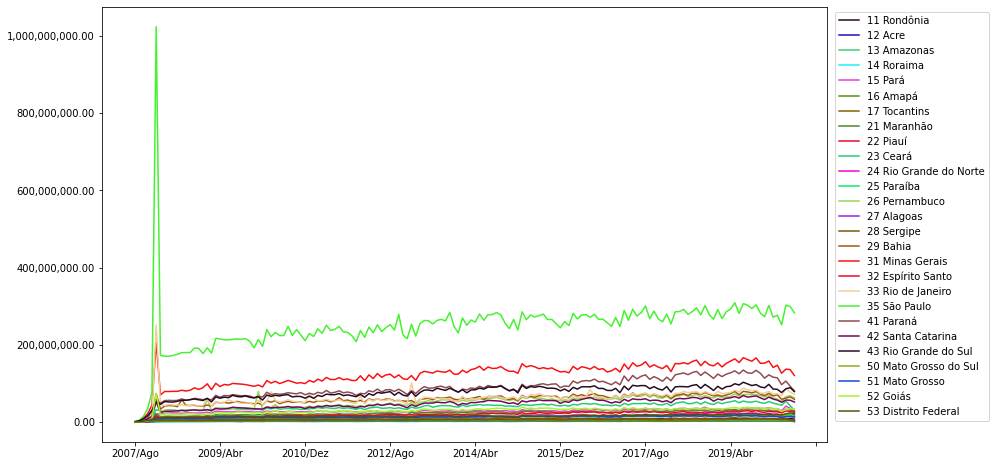

In [5]:
#Alterar as cores do Matplotlib
quantidade_cores = 27
cores = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(quantidade_cores)]
ax = dados_valores_preenchidos.T.plot(figsize=(13,8), color = cores)
ax.legend(loc="upper right", bbox_to_anchor=(1.23, 1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

In [6]:
#Adicionar uma coluna mostrando a região (Norte, Nordeste, Sul, Sudeste e Centro-Oeste) de cada estado.
tabela_regiao_brasil = (['1','NORTE'], ['2', 'NORDESTE'], ['3','SUDESTE'], ['4','SUL'], ['5','CENTRO-OESTE'])

df_regiao_brasil = pd.DataFrame(tabela_regiao_brasil, columns=['Codigo', 'Região'])

regioes = []
for index, row in dados_valores_preenchidos.iterrows():
   for index_regiao, row_regiao in df_regiao_brasil.iterrows():
        if index.startswith(row_regiao['Codigo']):
            regioes.append(row_regiao['Região'])
            break
     
dados_valores_preenchidos.insert(0, 'Região', regioes)
dados_valores_preenchidos




,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,NORTE,4209.37,16397.03,133645.19,346912.84,711758.31,1.829560e+06,1.940793e+06,1.955722e+06,2.143354e+06,2.280383e+06,2.624543e+06,2.973421e+06,2.938286e+06,2.843931e+06,2.878153e+06,2.780023e+06,2.651805e+06,3.147566e+06,3.082108e+06,4.190355e+06,4.040252e+06,3.946424e+06,3.372378e+06,3.720609e+06,3.787323e+06,3.679370e+06,3.866147e+06,3.667809e+06,3.633472e+06,3.812316e+06,3.911776e+06,4.663061e+06,4.524545e+06,4.778755e+06,4.369733e+06,4.632439e+06,4.464307e+06,4.668642e+06,4.490368e+06,...,8.133489e+06,8.140639e+06,8.041249e+06,8.199033e+06,8.363386e+06,7.889820e+06,8.603944e+06,8.048398e+06,8.159737e+06,8.457456e+06,7.766983e+06,8.858846e+06,8.407076e+06,9.492939e+06,8.206196e+06,9.011613e+06,9.124968e+06,8.406733e+06,8.411360e+06,8.651082e+06,8.193426e+06,8.388269e+06,8.645316e+06,9.050329e+06,9.211263e+06,9.490545e+06,8.600886e+06,8.919191e+06,8.909112e+06,8.409386e+06,8.924348e+06,8.948606e+06,8.660753e+06,8.326416e+06,8.413784e+06,7.174312e+06,7.423679e+06,8.581195e+06,9.193594e+06,7.407388e+06
12 Acre,NORTE,10470.07,14001.71,86200.85,301323.68,769612.36,1.731745e+06,1.743979e+06,2.057439e+06,2.057830e+06,2.226578e+06,2.112577e+06,2.029128e+06,1.886872e+06,2.084885e+06,2.230838e+06,2.122013e+06,2.196652e+06,2.152239e+06,2.086776e+06,2.476364e+06,2.396888e+06,2.610262e+06,2.174098e+06,2.051885e+06,1.714708e+06,1.341532e+06,2.288459e+06,2.462713e+06,2.254900e+06,2.381536e+06,2.079981e+06,2.564838e+06,2.588318e+06,2.538526e+06,2.319786e+06,2.279157e+06,2.454599e+06,2.578924e+06,2.625443e+06,...,2.811365e+06,3.161447e+06,3.355223e+06,3.562692e+06,3.375297e+06,3.341498e+06,3.358378e+06,3.145385e+06,2.638774e+06,2.968169e+06,2.769797e+06,3.057632e+06,2.874965e+06,3.175575e+06,3.060903e+06,3.253012e+06,3.040645e+06,2.926179e+06,3.126121e+06,2.473455e+06,2.277493e+06,2.594347e+06,2.234388e+06,2.473008e+06,2.979765e+06,3.070534e+06,3.249053e+06,3.567539e+06,2.981073e+06,2.998860e+06,3.293379e+06,3.174249e+06,2.959569e+06,3.261124e+06,2.981264e+06,2.859102e+06,2.472063e+06,2.383895e+06,2.199921e+06,1.163813e+06
13 Amazonas,NORTE,35752.72,45570.64,416012.30,2020381.79,5949408.99,1.141921e+07,7.934652e+06,8.641517e+06,8.531576e+06,9.079902e+06,8.646296e+06,8.755806e+06,8.331764e+06,8.148090e+06,7.681661e+06,7.761445e+06,7.764783e+06,8.607223e+06,8.385963e+06,9.207129e+06,8.160517e+06,8.562322e+06,9.484999e+06,9.465069e+06,9.267007e+06,9.092824e+06,9.218407e+06,8.674068e+06,8.365788e+06,9.386945e+06,8.373049e+06,1.032115e+07,9.990164e+06,9.767161e+06,9.151838e+06,9.140197e+06,9.437224e+06,9.742680e+06,9.996686e+06,...,1.371783e+07,1.390957e+07,1.371883e+07,1.439621e+07,1.374530e+07,1.397979e+07,1.389552e+07,1.351812e+07,1.363519e+07,1.454945e+07,1.275356e+07,1.474941e+07,1.457793e+07,1.538106e+07,1.465365e+07,1.554460e+07,1.637496e+07,1.534334e+07,1.624996e+07,1.425541e+07,1.427405e+07,1.535891e+07,1.410007e+07,1.610397e+07,1.615449e+07,1.652998e+07,1.550998e+07,1.664222e+07,1.649372e+07,1.534632e+07,1.628244e+07,1.478133e+07,1.492338e+07,1.593956e+07,1.513811e+07,1.477374e+07,1.633091e+07,1.944115e+07,1.750933e+07,1.335851e+07
14 Roraima,NORTE,4785.91,11858.63,43852.67,369328.51,470676.43,8.084484e+05,7.71687

Text(0.5, 0, 'Mês')

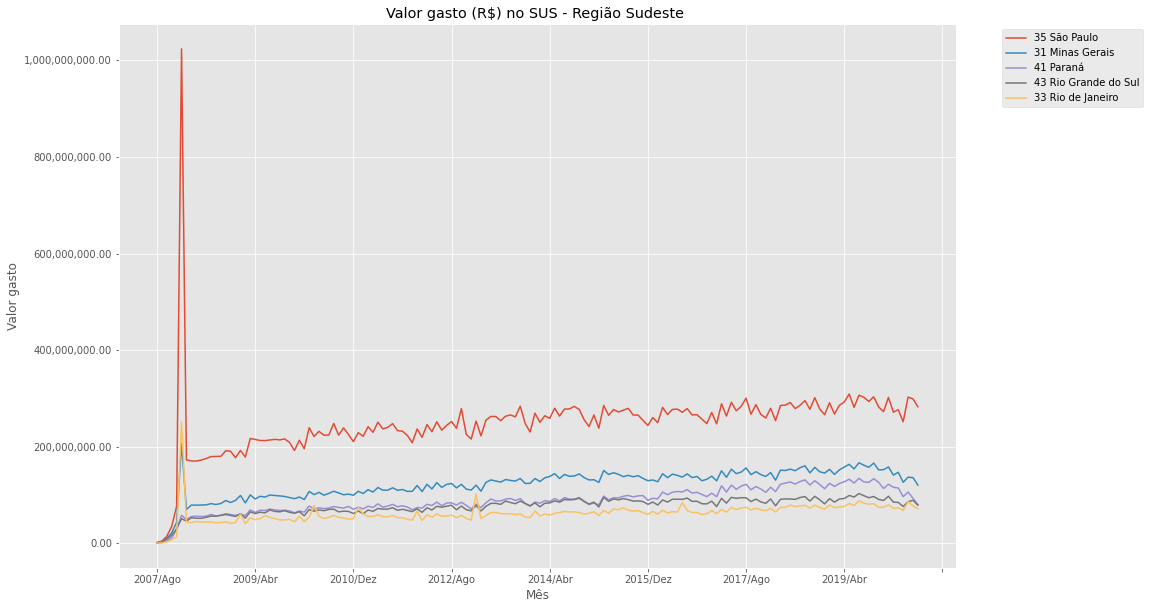

In [36]:
#Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)
dados_valores_preenchidos['Total'] = dados_valores_preenchidos.sum(axis=1)
ordenado_por_total = dados_valores_preenchidos.sort_values(by='Total', ascending=False)
ordenado_por_total = ordenado_por_total.drop(["Total", "Região"], axis=1)
dados_para_grafico = ordenado_por_total[:5]
ax = dados_para_grafico.T.plot(figsize=(15,10))
ax.legend(loc="upper right", bbox_to_anchor=(1.23, 1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.style.use("ggplot")
plt.title("Valor gasto (R$) no SUS - Região Sudeste ")
plt.ylabel("Valor gasto")
plt.xlabel("Mês")

